In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [2]:
data1 = pd.read_csv("C:/Users/Hasen Meron/Desktop/excelr/data_clean.csv")
data1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
data1.shape

(158, 10)

In [4]:
type(data1)

pandas.core.frame.DataFrame

In [5]:
# we are doing this in order to help us identify if there are columns which need to be converted to their proper data type. As for eg here we can see that Temperature and Month are classified as objects which should have been float or integer.
data1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [6]:
#In addiction to the above method we can also use the info method to see what is the type of a column.

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [7]:
# Based on the above result we can now convert the columns which we need to. THis conversion of columns is called Type conversion


In [8]:
# But before converting the columns we have here in this data set a column that is unnecessary "Unnamed". So let us drop this column

data2 = data1.drop(["Unnamed: 0"], axis = 1)


In [9]:
data2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [10]:
# We can make a copy of the original data set by the code below
data = data2.copy()
data.describe()
# the describe function will give a summary of the data set as below

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


### Type Conversion

In [11]:
data["Month"] = pd.to_numeric(data["Month"], errors = "coerce")
data["Temp C"] = pd.to_numeric(data["Temp C"], errors = "coerce")
data["Weather"] = data["Weather"].astype("category")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


### Duplicates

In [13]:
# To see how many duplicates are there we can do:
data[data.duplicated()].shape

(1, 9)

In [14]:
# this (1,9) means that there is onyl one row which is duplicated

In [15]:
# to see which row/rows are duplicated :
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [16]:
# But inorder to know to which another row or record is this row duplicate we can have a filter:
data[data.Ozone==14]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
13,14.0,274.0,10.9,68.0,5.0,14,2010,68,S
15,14.0,334.0,11.5,64.0,5.0,16,2010,64,S
147,14.0,20.0,16.6,63.0,9.0,25,2010,63,PS
150,14.0,191.0,14.3,75.0,9.0,28,2010,75,S
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [17]:
# So from the above result we can see that row 150 and 156 are duplicates

In [18]:
# Now we can proceed with removing or droping the duplicated row. This method will remove all the other duplicates and will retain teh first occurence.
data_cleaned1 = data.drop_duplicates()

In [19]:
data_cleaned2 = data_cleaned1.drop(["Temp C"], axis = 1)
data_cleaned2   # to drop a double Temp column

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


### Renaming columns

In [20]:
data_cleaned3 = data_cleaned2.rename({"Solar.R":"Solar"}, axis = 1)
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


## Detection of Outliers

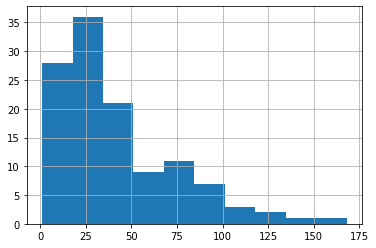

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
data_cleaned3["Ozone"].hist()

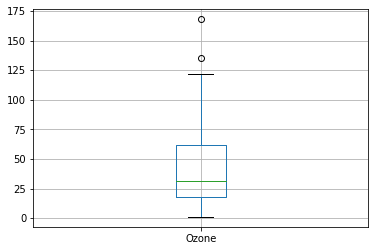

In [22]:
data_cleaned3.boxplot(column=["Ozone"])

In [23]:
data_cleaned3.Ozone.describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [24]:
# from the above summary we can now calculate the upper and lower fences or limits
q1 = 18
q3 = 62
iqr = q3 - q1
UF = 62 + (1.5*(iqr))
UF

128.0

In [25]:
# therefore any value above this UF(Upper fence) is an outlier
outliers = data_cleaned3[data_cleaned3.Ozone>UF]
outliers

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
61,135.0,269.0,4.1,7.0,1,2010,84,S
116,168.0,238.0,3.4,8.0,25,2010,81,PS


## Missing values detection and treatment

In [26]:
# To see if we do have null values we can use:
data_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 10.1 KB


In [27]:
# Another method of identifying null value is 
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

### Another method of detecting null values is using heat map


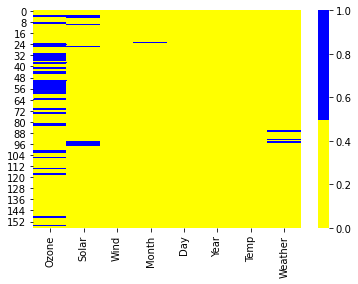

In [28]:
import seaborn as sns
%matplotlib inline
cols = data_cleaned3.columns
colours = ["Yellow", "Blue"]
sns.heatmap(data_cleaned3[cols].isnull(), cmap = sns.color_palette(colours))

#### So when you want to remove or treat the null values the code migt take it as if going for every null value as separate null value even if they are in the same row. SO to avoid this we have a code :


In [29]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].shape

(46, 8)

In [30]:
data_nonnull=data_cleaned3.dropna()
data_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    111 non-null    float64 
 1   Solar    111 non-null    float64 
 2   Wind     111 non-null    float64 
 3   Month    111 non-null    float64 
 4   Day      111 non-null    int64   
 5   Year     111 non-null    int64   
 6   Temp     111 non-null    int64   
 7   Weather  111 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 7.1 KB


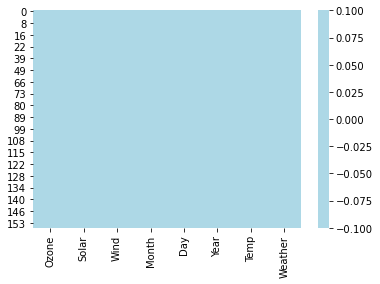

In [31]:
sns.heatmap(data_nonnull[cols].isnull(), cmap=sns.color_palette(["#ADD8E6"]))

## Treating the null values using mean called as mean imputation

In [32]:
mean = data_cleaned3["Ozone"].mean()
mean

41.81512605042017

In [33]:
data_cleaned3["Ozone"] = data_cleaned3["Ozone"].fillna(mean) 

In [34]:
median = data_cleaned3["Solar"].median()
median

199.0

In [35]:
data_cleaned3["Solar"] = data_cleaned3["Solar"].fillna(median)

In [36]:
data_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    157 non-null    float64 
 1   Solar    157 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 10.1 KB


## Correlation Analysis

In [37]:
# As example ew can see the reation between temp and Ozone from the above cleaned data set

Text(0, 0.5, 'Ozone')

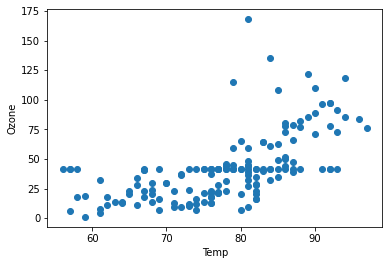

In [38]:
plt.scatter(data_cleaned3["Temp"], data_cleaned3["Ozone"])
plt.xlabel("Temp")
plt.ylabel("Ozone")

In [39]:
import numpy as np
np.corrcoef(data_cleaned3["Temp"], data_cleaned3["Ozone"])

array([[1.        , 0.60649962],
       [0.60649962, 1.        ]])

In [40]:
x = np.random.uniform(0,1,1000)
y = np.random.uniform(0,1,1000)

In [41]:
np.corrcoef(x,y)

array([[ 1.        , -0.00788292],
       [-0.00788292,  1.        ]])

### To see the relation between all the variables in the data set

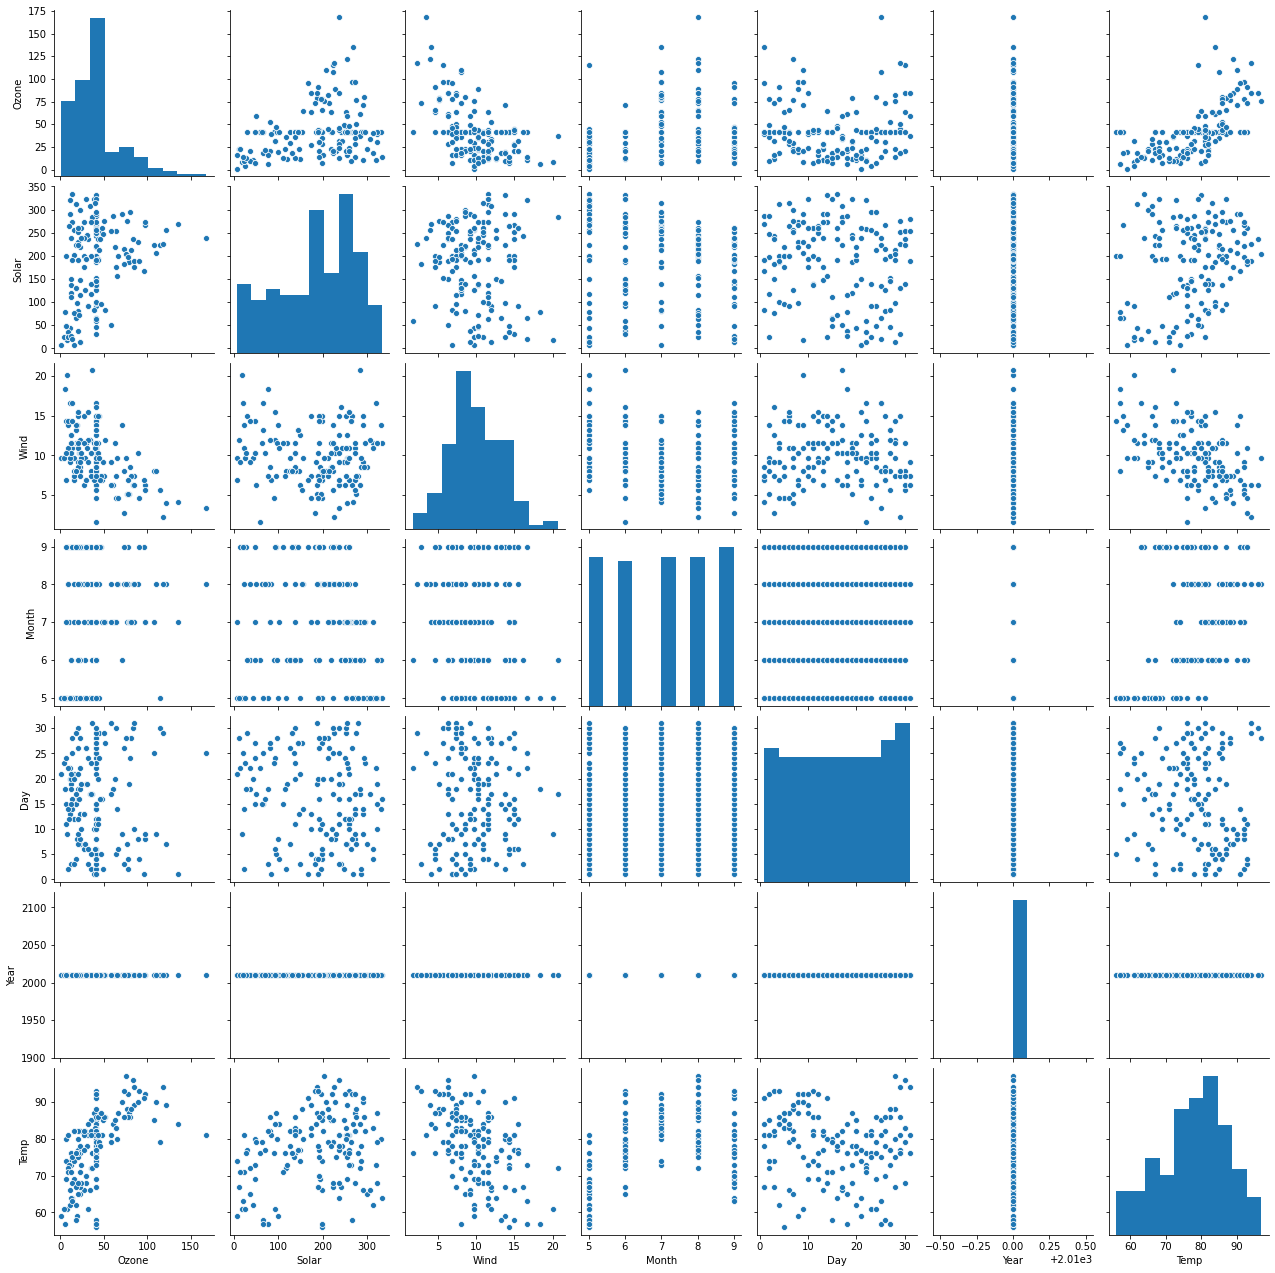

In [42]:
sns.pairplot(data_cleaned3)

In [43]:
# Correlation in number wise
data_cleaned3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304572,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.304572,1.000000,-0.057709,-0.094553,-0.156243,NaN,0.256994
Wind,-0.520004,-0.057709,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094553,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.156243,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.256994,-0.441228,0.398516,-0.122787,NaN,1.000000


In [44]:
data_cleaned3["Weather"].value_counts()

S     58
C     49
PS    47
Name: Weather, dtype: int64

In [45]:
data_dummy = pd.get_dummies(data_cleaned3, columns = ["Weather"])

In [46]:
data_dummy.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
Ozone,1.000000,0.304572,-0.520004,0.132860,-0.021916,NaN,0.606500,0.078089,0.006708,-0.087649
Solar,0.304572,1.000000,-0.057709,-0.094553,-0.156243,NaN,0.256994,0.052955,-0.083638,0.066994
Wind,-0.520004,-0.057709,1.000000,-0.166216,0.029900,NaN,-0.441228,-0.028197,-0.004008,0.019881
Month,0.132860,-0.094553,-0.166216,1.000000,0.050055,NaN,0.398516,-0.044230,0.053856,-0.026609
Day,-0.021916,-0.156243,0.029900,0.050055,1.000000,NaN,-0.122787,-0.033141,0.008229,0.045825
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.256994,-0.441228,0.398516,-0.122787,NaN,1.000000,-0.000756,-0.060859,0.030654
Weather_C,0.078089,0.052955,-0.028197,-0.044230,-0.033141,NaN,-0.000756,1.000000,-0.440290,-0.515564
Weather_PS,0.006708,-0.083638,-0.004008,0.053856,0.008229,NaN,-0.060859,-0.440290,1.000000,-0.500321
Weather_S,-0.087649,0.066994,0.019881,-0.026609,0.045825,NaN,0.030654,-0.515564,-0.500321,1.000000


## Normalization of the data

In [47]:
# converting data into z score


# this is built by ourselves as such it is called user built function


def z_conv(x):
    temp_var = (x-x.mean())/x.std()
    return temp_var

df_norm = z_conv(data_cleaned3.iloc[:,0:-1])
df_norm

,Ozone,Solar,Wind,Month,Day,Year,Temp
0,-2.869722e-02,0.046246,-0.721769,-1.421283,-1.663613,NaN,-1.142460
1,-2.047266e-01,-0.780914,-0.550594,-1.421283,-1.552185,NaN,-0.610847
2,-1.049667e+00,-0.424776,0.761746,-1.421283,-1.440757,NaN,-0.398202
3,-8.384323e-01,1.459312,0.447926,-1.421283,-1.329329,NaN,-1.674074
4,5.003055e-16,0.149641,1.246742,-1.421283,-1.217901,NaN,-2.312010
...,...,...,...,...,...,...,...
152,-7.680205e-01,0.425361,0.447926,1.376448,1.567799,NaN,-1.036138
153,-2.869722e-02,0.046246,-0.721769,-1.421283,-1.663613,NaN,-1.142460
154,-4.159618e-01,0.080711,-0.864415,1.376448,1.122087,NaN,-0.823493
155,5.003055e-16,-0.470729,0.932921,1.376448,1.233515,NaN,-0.079234


In [48]:
!pip3 install pandas_profiling --upgrade

Requirement already up-to-date: pandas_profiling in c:\users\hasen meron\3d objects\anaconda exelr\lib\site-packages (3.0.0)


In [49]:
!pip install pandas_profiling 
!pip install sweetviz

## Speeding up the the EDA process or doing auto EDA

In [50]:
import pandas_profiling as pp
import sweetviz as sv

In [51]:
EDA_report = pp.ProfileReport(data_cleaned3)

In [52]:
EDA_report.to_file(output_file = "report.html")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
data_cleaned3["Ozone"].mean()

41.815126050420155